In [171]:
import numpy as np 
import matplotlib.pyplot as plt
import cv2 
from PIL import Image
import random
import curses

In [237]:
class CGOL:
    
    def __init__(self,height,width, num_cells):
        self.height = height
        self.width = width
        self.life_board = None
        self.num_cells = num_cells
        self.create_life_board()
        self.set_first_gen(self.num_cells)        

    def create_life_board(self):

        # create game of life board
        self.life_board = np.zeros([self.height, self.width], dtype=int)


    def set_first_gen(self, num_cells):
        self.num_cells = num_cells
        
        for cell in range(self.num_cells):
            col = random.randrange(self.width)
            row = random.randrange(self.height)

            self.life_board[row][col]=1

    def evaluate_single_step(self):

        new_board = self.life_board.copy()

        for r, c in np.ndindex(self.life_board.shape):
            cell = self.life_board[r,c]
            check = self.life_board[max(r-1, 0):min(r+2, self.height), max(c-1, 0):min(c+2, self.width)] 
            alive_neighbors = np.sum(check)

            if cell == 1:
                alive_neighbors -= 1          

            if cell == 1 and alive_neighbors <= 1:
                new_board[r,c] = 0

            elif cell == 1 and (alive_neighbors == 2 or alive_neighbors == 3):
                new_board[r,c] = 1

            elif cell == 1 and alive_neighbors > 3:
                new_board[r,c] = 0

            elif cell == 0 and alive_neighbors == 3:
                new_board[r,c] = 1

        self.life_board = new_board

MovieWriter imagemagick unavailable. Trying to use pillow instead.


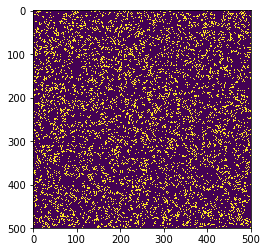

In [249]:
def update(i):
    label = 'timestep {0}'.format(i)
    
    CGOL_instance.evaluate_single_step()
    
    cell_plot.set_data(CGOL_instance.life_board)

In [ ]:
CGOL_instance = CGOL(1000,1000,500000)

fig, ax = plt.subplots()
cell_plot = ax.imshow(CGOL_instance.life_board)
anim = FuncAnimation(fig, update, frames=np.arange(0, 25), interval=200)
anim.save('line.gif', dpi=80, writer='imagemagick')

MovieWriter imagemagick unavailable. Trying to use pillow instead.
